In [ ]:
import numpy as np
try:
  %tensorflow_version 2.x
except Exception:
  pass


import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Preparing the Training Data

In [ ]:
X = np.array([-20, -5, 1, 5, 20, 55, 76], dtype=float)
y = np.array([-10,35,53,65,110,215,278], dtype = float)

# Defining Our Model
**Model and Layer Specification**
We need to first instantiate (create and instance) a layer by calling tf.keras.layers.Dense
- input_shape=[1] - Value of 1 specify that we are only taking a single value to this layer. In our case, X.
- units = 1 - Value of 1 specify that we are informing keras we are creating a neural network with only one neuron (some time called internal variable). The more complex a problem is, the more neuron you will need to learn the pattern. You may need more than a layer as well.
- For our problem, we only have one layer. The input_shape then is also our first layer. With us specifying it as 1 then, we are defining our neural network to take only a single value, which is a floating point number. Similarly, as this is our only layer, it is also our final layer. The "units" specify the number of output from our neural network - a single value, which is a single floating point number. One need to take care in a multi-layered network, the size and shape of the output layer as defined by "units" would need to match the "input_shape" of the next layer.


We can define this way:

In [ ]:
layer_1 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer_1])

or this way:

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

# Compile Model
We need to compile our neural network with further parameters:
- Loss function: the loss function is a performance metric. It is used to measure the errors of our model against the actual outcome. It is called the loss function because the difference between our prediction and actial is called "loss"
- Optimizer function: this is the mathematic function that is used to adjust the model parameters to improve prediction accuracy.

In [ ]:
learning_rate = 0.1
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate))

The learning rate (0.01 in our code) specified the step size taken by the optimizer when adjusting values in the model. there are no hard and fast rules with this. It will involve some trial and error. If it is too small, it will take too long and our model might not have converged yet when the training stopped as specified by the epoch variable. If it is too large, it might not converge at all. The typical range is usually between 0.001 (default value) and 0.1

# Training the Model
We can now proceed to train our model by calling the "fit" method
Recall our actual model was "y = 3X + 50. The slope 3 and intercept (bias) 50 are two coefficients that we are asking the neural network to estimate.
- the neural network starts off with a random value (also called weights) and use it and the input X to compute y. As the weights started off with a random value, the prediction will start off with large errors
- The loss value is calculated using the loss function taking the prediction and actual value into account.
- The optimizer then makes slight adjustments (according to the learning rate) to the weights with the goal of reducing the loss.
- One epoch is the full iteration of the examples we have seen. i.e., all our data.
**Parameters**
- Input, X, in our case
- Output, y, in our case
- epochs specifies how many cycles should be run
- verbose argument controls how much output the fit method is displayed on the console.

In [ ]:
history = model.fit(X, y, epochs=1000, verbose = False)

# Visualize Model Training
- The fit method returned the training history statistics. We can access it via "history"
- High loss means high error
- By plotting it over epoch, we can visualize the error / accuracy over epoch


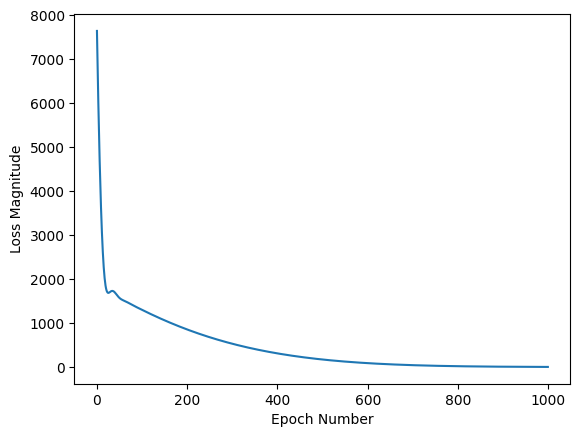

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

# Looking Under the Hood


In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 160ms/step
[[350.7672]]


In [ ]:
model.get_weights()

[array([[3.0280418]], dtype=float32), array([47.962997], dtype=float32)]

Recall y = 3X + 50. We are asking the neural network to estimate 3 (first variable) and 50 (second variable).